# Types of Classification Algorithms

In this note book we will be talking about 7 types of regression Machine Learning algorithms in detail. Those six Algorithms are as follows,

    1. Logistic Regression
    2. K-Nearest Neighbors (K-NN)
    3. Support Vector Machine (SVM)
    4. Kernel SVM
    5. Naive Bayes
    6. Decision Tree Classification
    7. Random Forest Classification

## 1. Logistic Regression

* Regression? But isn't this about classification? Yes and Yes, Logistic regression is a regression algorithm that can be used as a Binary classification algorithm. Meaning that it can predict either two values.

* We know what happen in regression is that it try to fit a line that best fit the data points, But in a classification problem if we try to plot a scatter plot where there are only two classes, points will be in two distinct sides of the plot and regression line would look like below.

<img src="images/logistic_regression_1.png"/>

* As you can see that, even though logistic regression cannot exactly predict the class when a age is given. It can,
    * When considering the middle portion, we can see that regression line can predict values between 0-1, We can consider this as a probability. higher the probability higher chance of being class '1' or lower the probability higher the chance of being class'0'
    * If we consider the lower half that is out of bounds,since we cannot have negative probabilities. we can predict that as people fall in that age group will definietly belong to class '0'
    * If we consider the upper half that is out of bounds,since we cannot have  probabilities higher than 1, we can predict that as people fall in that age group will definietly belong to class '1'
    
__So if we simplyfy things it would look like this,__

<img src="images/logistic_regression.png"/>

* So what we do is we use  function called sigmoid that when a function is passed to it it spits out values between 0-1 no matter what the function is,

<img src="images/logistic_regression_sigmoid.png"/>

* As any regression function do now that we have a best fitting line for this data we can predict any values between 0-1. but thats not good enough right. We want to know whether it is 0 or 1. So what Logistic regression does is when a threshold (lets say 0.5) is given it all values that are less that 0.5 are valued as 0 and everything higher than and equal to 0.5 are considered as 1.

<img src="images/final.png"/>

In [1]:
# Lets implement the logistic regression

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

In [2]:
# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# now lets see some details regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# There is one categorical variable but, we will not be using that

In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


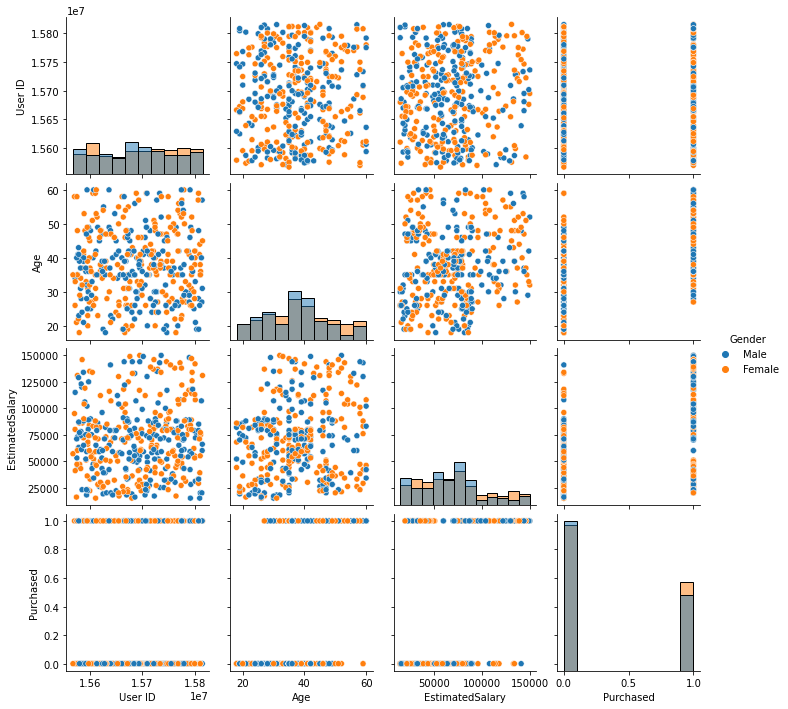

In [7]:
# it seems there are no missing values, so we dont have to do anything

# Explotary data analysis
import seaborn as sns

sns.pairplot(data=data,hue='Gender',diag_kind='hist');

In [8]:
# does not seems to have any noticeble correlation, we'll see...

In [9]:
# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:5]

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926]])

In [11]:
# Now we will create the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

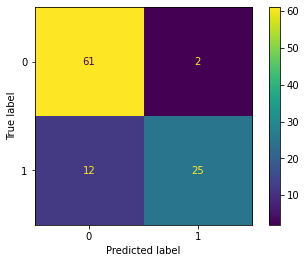

In [12]:
# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_logistic_reg = ConfusionMatrixDisplay(conf_mat)
disp_logistic_reg.plot();

In [13]:
# It seems 86 correct predictions (True Positives, True Negatives)
# And 14 incorrect predictions (False Positives,Flase Negatives)

# Lets just see the score
model.score(X_test,y_test)

0.86

In [14]:
# has 86% accuracy that is good

## 2. K-Nearest Neighbours

In this algorithm what happens is that when a new data point is introduced, model will calculate the euclidean distances forfor every point and according to the K it will select the nearest neighbours and count the classes and decide wich class the new point belons to

__K value is always should be a Odd number because that way we can make sure their is a dominant class, otherwise it will be a draw and model can be confused__

So the steps are as follows,

1. Calculate the Euclidean Distance for every point
2. Select the nearest 'K' number of neighbours
3. Count the number of neighbours belong to each class
4. Decide the class of the new point, considering the higher count class

<img src="images/KNN_1.png"/>

<img src="images/KNN_2.png"/>

<img src="images/KNN_3.png"/>

<img src="images/KNN_4.png"/>

<img src="images/KNN_5.png"/>

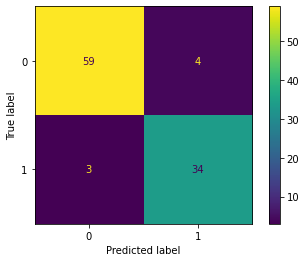

In [15]:
# Lets implemet this

# Since this is the same data set we dont have to do everything we did earlier
# but its good practice to do those

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now we will create the model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_KNN = ConfusionMatrixDisplay(conf_mat)
disp_KNN.plot();

In [16]:
# We can compare this with Logistic regression models confusion metrix

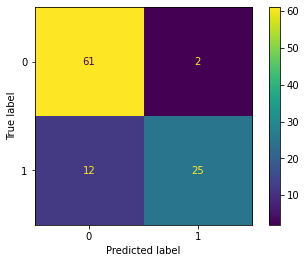

In [17]:
disp_logistic_reg.plot();

In [18]:
# we can see that KNN has less Wrong values comparing to Logistic Regression

## 3. Support Vector Machines (SVM)

* Let's say we have been given a dataset that has already got lables, So we can draw a line (imagine we are talking about 2 features hence 2D)(if its more than 2 dimensions it will be a __Hyperplane__) that seperate these two sets.

<img src="images/SVM_1.png"/>

* but how there can be many lines like that, What SVM do is try to find the lines that has the maximum margin

<img src="images/SVM_2.png"/>

* So why those points at the margin is called __Support vectors__ (in this case they can be support points but in reality when there are more than 2 dimensions a point is represent as a vector in there) because even without the rest of the points gone this model will still be able to predict new values.

* Since those two points are only things that support it, SVM base its prediction based on these two points.

> For example lets say there is a data set about apples and oranges, lets take the above one Red = apples and green = oranges. What machine learning models usually do is look at the most Applest apples (Red points that are farthest away from margin line) and try to learn from them what are the features of an apple and same goes for oranges as well.

> But what SVM does is it try to find most orangest apple (point that close to margin because it is lot closer to orages) and try to understand it as an apple. If it can identify the most orangest apple as an apple then usuall apple looking apples are nothing right... So that's the intuition behind SVM

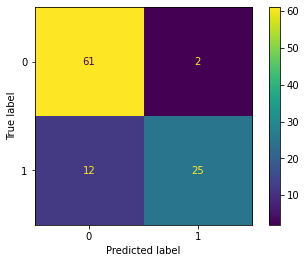

In [19]:
# Lets implemet SVM

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now we will create the model
from sklearn.svm import SVC

model = SVC(kernel='linear')

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_SVM = ConfusionMatrixDisplay(conf_mat)
disp_SVM.plot();

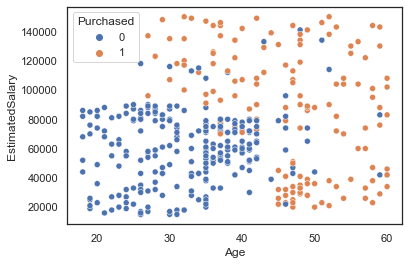

In [20]:
# We can see that is kind of worse because
# this data set is not linearly seperable and we are using a linear kernal

# our data set looks like
import seaborn as sns

sns.set_theme(style='white')
sns.scatterplot(data=data,x='Age',y='EstimatedSalary', hue='Purchased');

## 4. Kernal SVM



So in order to SVM to work, data must be linearly sperable, What if there was a data set like this

<img src="images/kernal_SVM_1.png"/>

What we can do is, We can project this 2 dimensional data to a higher dimension using some sort of a function. So in that higher plane they are linearly seperable.

<img src="images/kernal_SVM_2.png"/>

* This Function is called __Kernal Function__
* There are many Kernal function, some of the most used are as below.

    * Gaussian RBF Function
    * Sigmoid Function
    * Polynomial Function

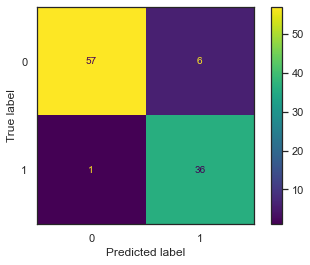

In [21]:
# Let's implement this shall we?

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now we will create the model
from sklearn.svm import SVC

# Now we will use a Kernal as RBF and see that sesults get drastically changed
model = SVC(kernel='rbf')

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_KSVM = ConfusionMatrixDisplay(conf_mat)
disp_KSVM.plot();

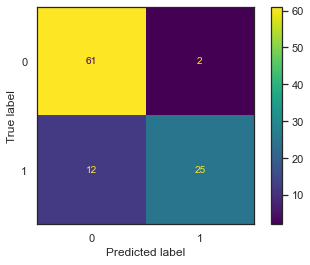

In [22]:
disp_SVM.plot();

In [23]:
# as you can see that the wrong predictions have drastically changed

## 5. Naive Bayes

This Machine Learning Model(Algorithm) is base on the Bayes theorem.

<img src="images/NB_theorem.png" style="width:60%"/>

Shown in the above image is the bays theorem. So we will discuss the intuition behind the Naive base based on the following scenario,

> Image we have a dataset with 30 entries containing features `Age` and `Salary` that shows how many of them walks to work or drives to work. We have to decide when a new point comes in whether that person drives to work or walks to work given his features



<img src="images/NB_1.png"/>

So the game plan is this,

1. We have to calculate probability of the person being `Walking to work` given his features : `P(Walk|X) = [P(X|Walk) x P(Walk)]/P(X)`
2. We have to calculate probability of the person being `Driving to work` given his features : `P(Drive|X) = [P(X|Drive) x P(Drive)]/P(X)`
3. Compare the two, and decide the most probabal label for that new person

<img src="images/NB_2.png"/>

<img src="images/NB_3.png"/>


> `P(X)` : __Given the features how likely a point appear that region in our data set considering the already existing datapoints__

We can understand this like this, say you draw a circle around your new point and how many points are inside the circle.

<img src="images/NB_4.png"/>

> `P(X|Walks)` : __This is the probability of that `walking to work` how likely to a walking data point to have that features `X`

We can understand this like this, say you draw a circle around your new point and you forget about the driving points. Inside your circle are the points that are most likely to have the new features. And you have to count just how many are there in the circle from the rest of the walking points.

<img src="images/NB_5.png"/>

* So after that we can compare the two probabilities like this and decide the label

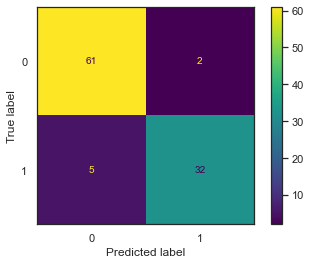

In [26]:
# Now let's implemnt the Naive Bayes Model

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now we will create the model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_NB = ConfusionMatrixDisplay(conf_mat)
disp_NB.plot();

In [27]:
# as you can see there are good results

## 6. Decision Tree

Just like in the Decision Tree Regression, here the same process happens. And create an decision tree based on the regions it has split the dataset according to the entropy.

<img src="images/DT_1.png"/>

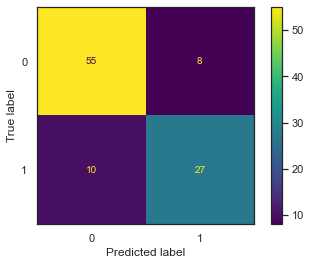

In [32]:
#Let's implement

# Now let's implemnt the Naive Bayes Model

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# We actually dont need to scale since decision tree is not based on distance calculations===============================

# but even if we do it's not going to break
# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ========================================================================================================================

# Now we will create the model
from sklearn.tree import DecisionTreeClassifier

# And we will choose entropy as the criterion
model = DecisionTreeClassifier(criterion='entropy')

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_DT = ConfusionMatrixDisplay(conf_mat)
disp_DT.plot();

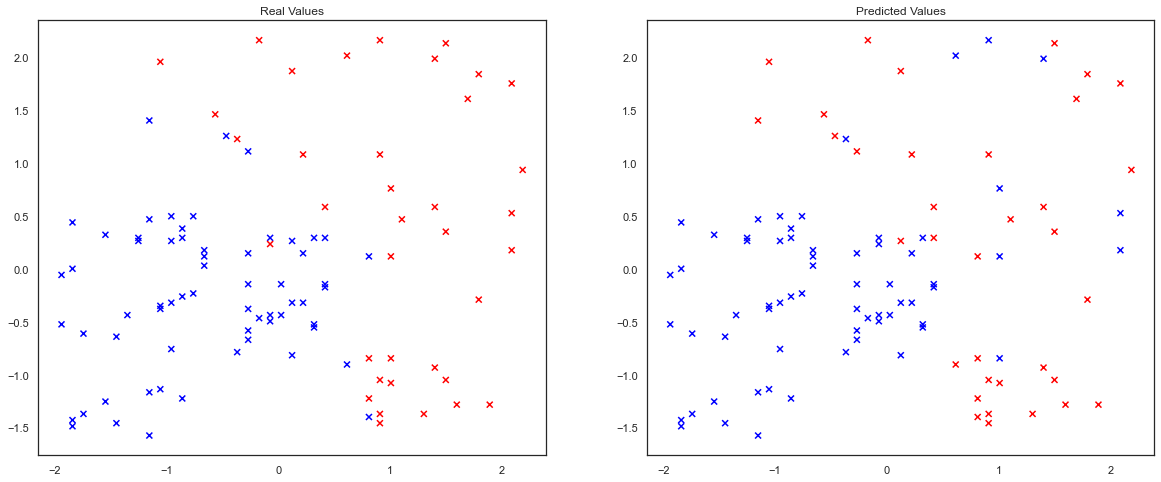

In [74]:
# Lets plot two scatter plots
df = pd.DataFrame({'Age':X_test[:,0],'EstimatedSalary':X_test[:,1], 'Purchased':y_test,'Predicted':y_pred})
df
fig, (ax1, ax2)= plt.subplots(nrows=1,ncols=2, figsize=(20,8))
ax1.scatter(data=df,x='Age',y='EstimatedSalary',c='Purchased', cmap='bwr',marker='x')
ax2.scatter(data=df,x='Age',y='EstimatedSalary',c='Predicted' , cmap='bwr',marker='x')
ax1.set_title('Real Values')
ax2.set_title('Predicted Values');

## 7. Random Forrest

Just like decision trees, what random forrest does is use multiple trees and try to predict the Labels, and pick the label that has most votes. 

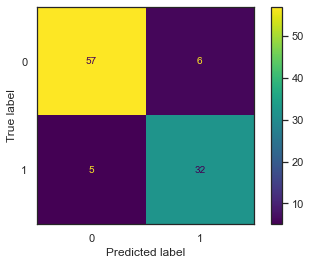

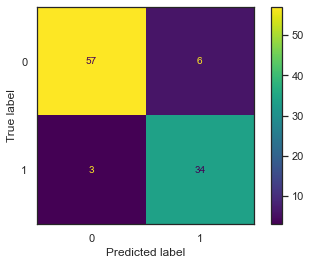

In [80]:
#Let's implement

# Now let's implemnt the Naive Bayes Model

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# We actually dont need to scale since decision tree is not based on distance calculations===============================

# but even if we do it's not going to break
# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ========================================================================================================================

# Now we will create the model
from sklearn.ensemble import RandomForestClassifier

# And we will choose entropy as the criterion
model_1 = RandomForestClassifier(n_estimators=100,criterion='entropy')
model_2 = RandomForestClassifier(n_estimators=200,criterion='entropy')

# Fit the models
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

# lets predict values using this model
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat_1 = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
disp_RF_1 = ConfusionMatrixDisplay(conf_mat_1)
disp_RF_1.plot()

conf_mat_2 = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
disp_RF_2 = ConfusionMatrixDisplay(conf_mat_2)
disp_RF_2.plot();